# NYC Yellow Taxi Data Exploratory Data Analysis

## Import Necessary Libraries

In [1]:
## Import necessary libraries
from urllib.parse import quote

## Import necessary API
import sys
sys.path.append('../../../../')
from api.v2.util.data_load import data_load
from api.v2.util.get_tag_name import show_column
from api.v2.eda.Data_Info import Data_Info
from api.v2.eda.Statistical_test import adf_test, kpss_test, pp_test, ljung_box_test, arch_test, vif_test
from api.v2.eda.Visualize_EDA import Visualize_EDA

## Set NYC Yellow Taxi Data Base Parameter

In [2]:
# Set NYC Yellow Taxi Data Base Parameter

# Set MachBase Neo URL address
URL = 'http://127.0.0.1:5654'
# Set Tag Table Name
table = 'taxi'
# Set TimeFormat - > 'default' or '2006-01-02 15:04:05.000000'(Divided down to the nanosecond)
timeformat = 'default'
# Set resample Option -> D(day), H(hour), T(minute), S(second)
resample_freq = None

## Check NYC Yellow Taxi Data Info

In [3]:
# Print NYC Yellow Taxi DataInfo
Data_Info(URL, table, timeformat, resample_freq)

Tag List: ['RatecodeID', 'VendorID', 'dropoff_latitude', 'dropoff_longitude', 'extra', 'fare_amount', 'improvement_surcharge', 'mta_tax', 'passenger_count', 'payment_type', 'pickup_latitude', 'pickup_longitude', 'tip_amount', 'tolls_amount', 'total_amount', 'trip_distance', 'trip_duration_minutes']
--------------------------------------------
Number of data: 9552411
--------------------------------------------
Start Time: 2014-12-31 15:00:00
End Time: 2016-03-31 14:59:59
--------------------------------------------
Missing Values: 0
--------------------------------------------
Smallest time interval: 1.00 seconds
Largest time interval: 28857601.00 seconds
--------------------------------------------
Maximum sampling rate (per second): 1.00 Hz
--------------------------------------------


## Set NYC Yellow Taxi Data Extra Parmeter
* Set based on the information confirmed in the previous step

In [4]:
# Set the desired tag names
tags = show_column(URL, table)
# Wrap each item in the list with single quotes and separate with commas
tags_ = ",".join(f"'{tag}'" for tag in tags)
# Set Tag Name
name = quote(tags_, safe=":/")
# Set Start time
start_time = '2015-01-01 00:00:00'
# Set End time 
end_time = '2015-02-01 00:00:00'
# Set TimeFormat - > 'default' or quote('2006-01-02 15:04:05.000000')(Divided down to the nanosecond)
timeformat = 'default'

In [5]:
# NYC Yellow Taxi Data Load
df = data_load(URL, table, name, start_time, end_time, timeformat, resample_freq)

In [6]:
df

NAME,RatecodeID,VendorID,dropoff_latitude,dropoff_longitude,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,pickup_latitude,pickup_longitude,tip_amount,tolls_amount,total_amount,trip_distance,trip_duration_minutes
TIME,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,1.0,1.0,40.768269,-73.921181,0.5,13.5,0.0,0.5,5.0,2.0,40.760201,-73.971436,0.00,0.0,14.50,4.00,11.433333
2015-01-01 00:00:01,1.0,1.0,40.752285,-73.868111,0.5,5.0,0.0,0.5,1.0,2.0,40.757294,-73.860847,0.00,0.0,6.30,0.80,3.800000
2015-01-01 00:00:03,1.0,2.0,40.776970,-73.976921,0.5,9.0,0.3,0.5,1.0,1.0,40.765270,-73.987579,1.90,0.0,12.20,1.58,10.783333
2015-01-01 00:00:04,1.0,1.0,40.800617,-73.966019,0.5,10.5,0.0,0.5,3.0,2.0,40.774502,-73.957008,0.00,0.0,11.80,2.50,10.666667
2015-01-01 00:00:05,1.0,2.0,40.769825,-73.950943,0.5,8.5,0.3,0.5,2.0,1.0,40.769863,-73.950500,2.00,0.0,11.80,1.30,10.783333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-31 23:59:55,1.0,2.0,40.739891,-74.006042,0.5,12.5,0.3,0.5,1.0,1.0,40.722530,-73.987000,2.76,0.0,16.56,2.39,17.750000
2015-01-31 23:59:56,1.0,2.0,40.774490,-73.987640,0.5,6.5,0.3,0.5,1.0,1.0,40.767067,-73.981735,1.56,0.0,9.36,0.99,7.016667
2015-01-31 23:59:57,1.0,2.0,40.720139,-73.985397,0.5,10.5,0.3,0.5,3.0,2.0,40.734058,-73.998611,0.00,0.0,11.80,1.75,14.050000


## Check Visualize_EDA

Start Visualize All Method
Removed NaN Columns: set()


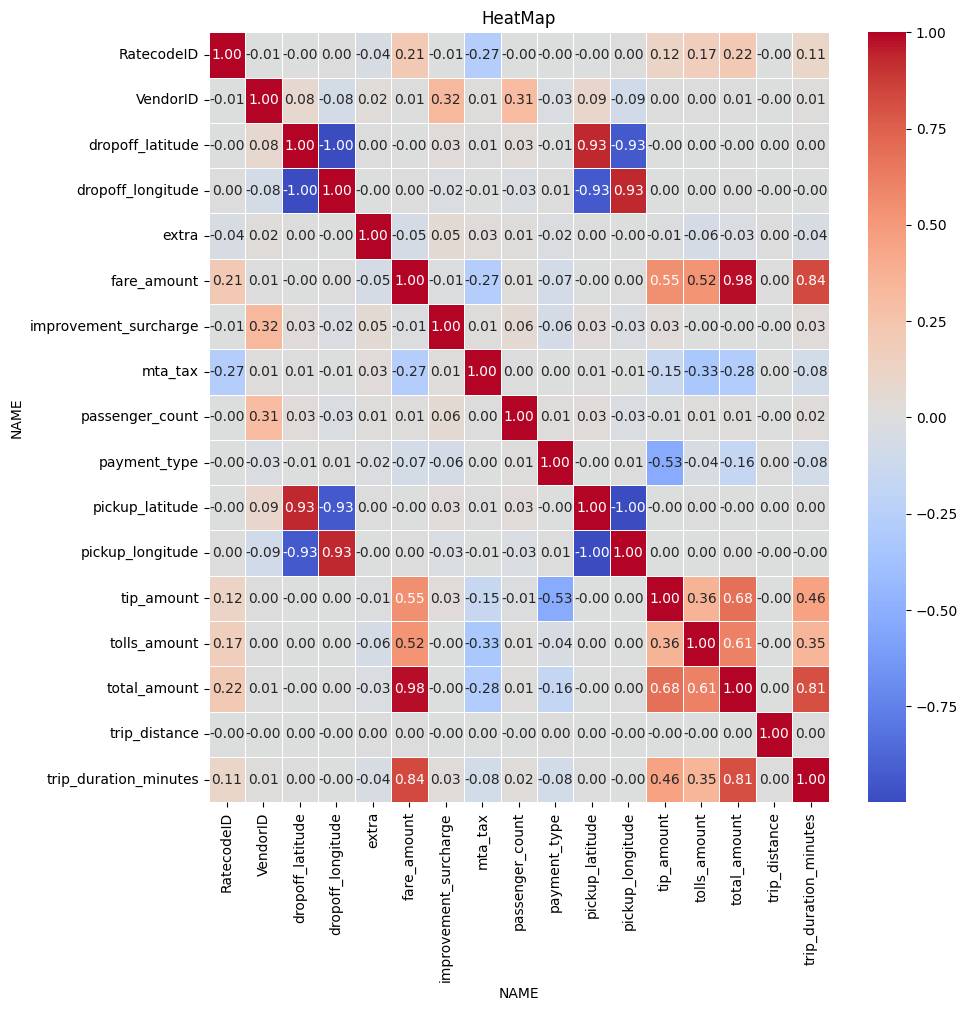

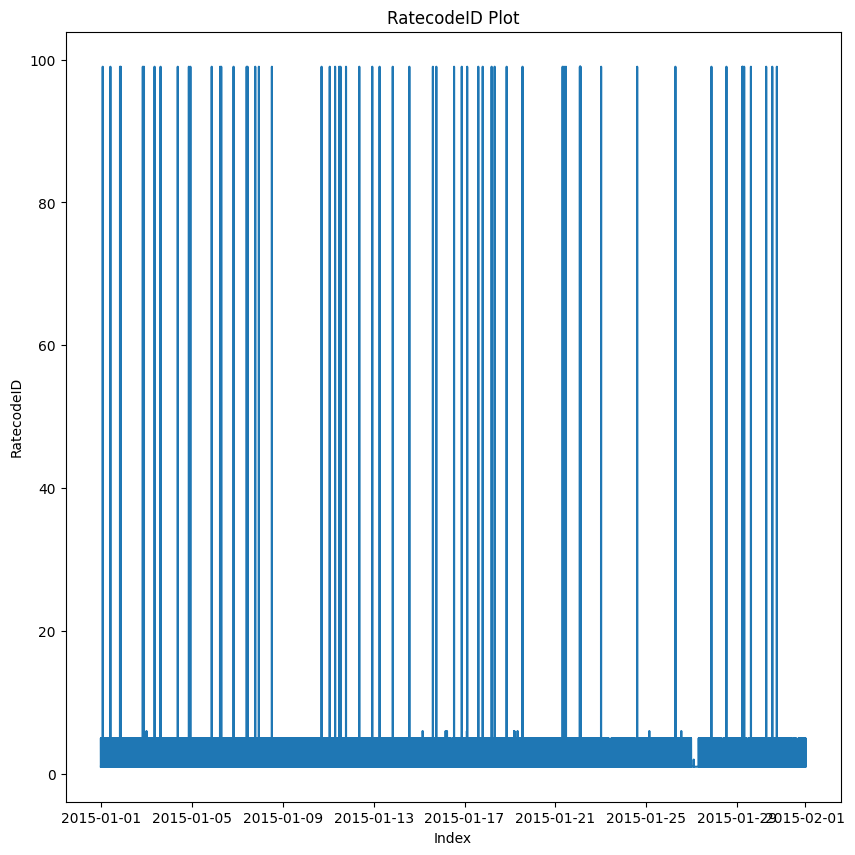

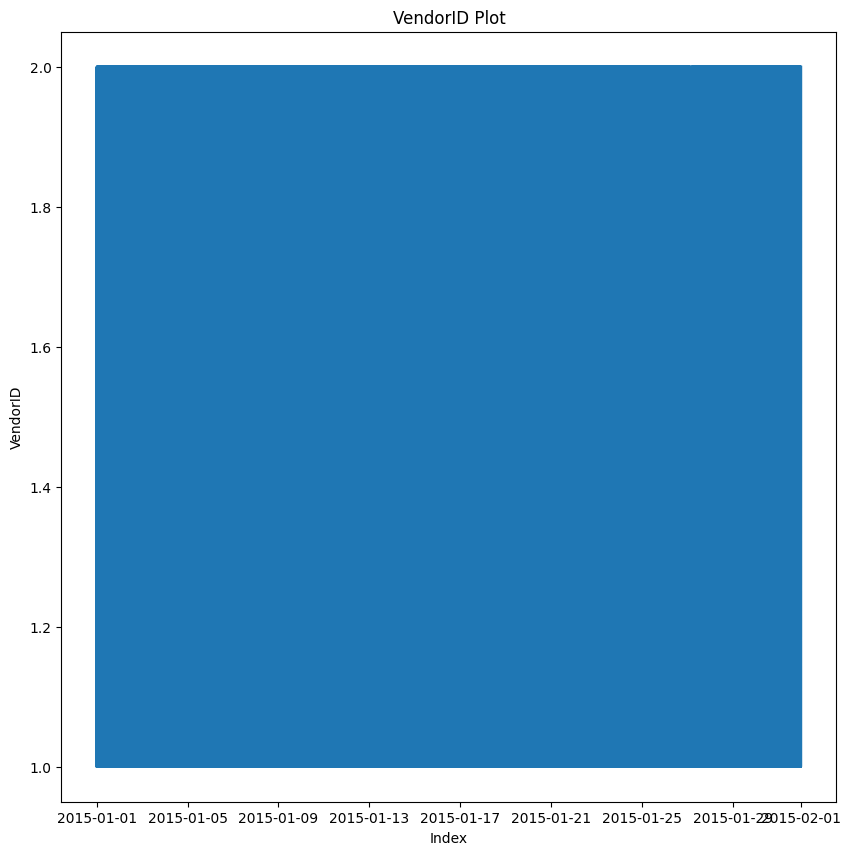

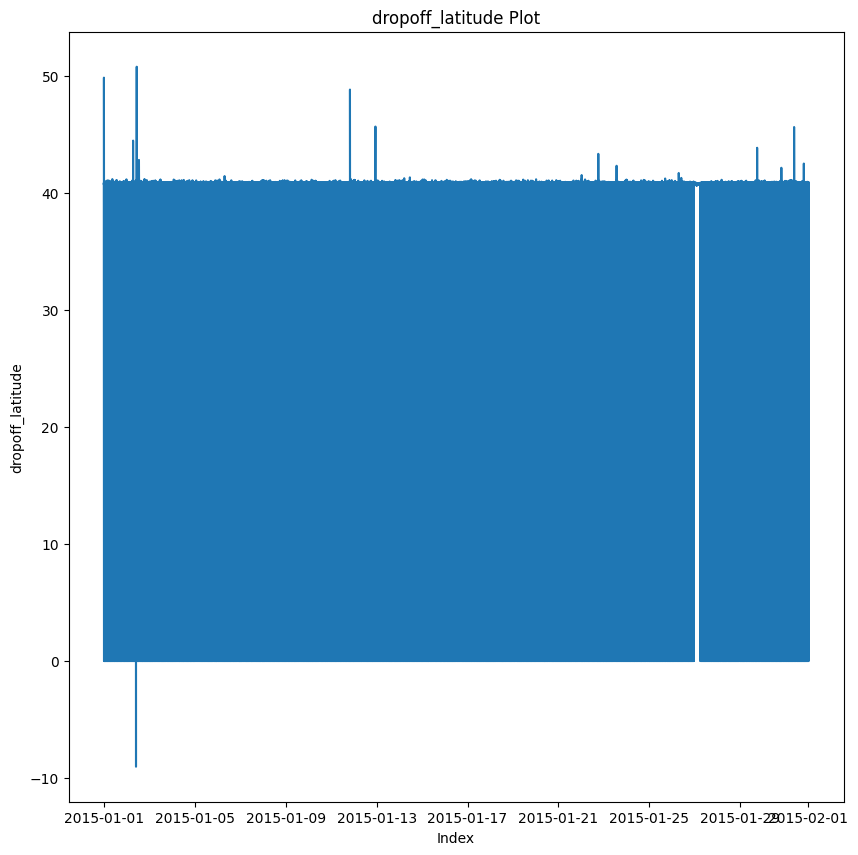

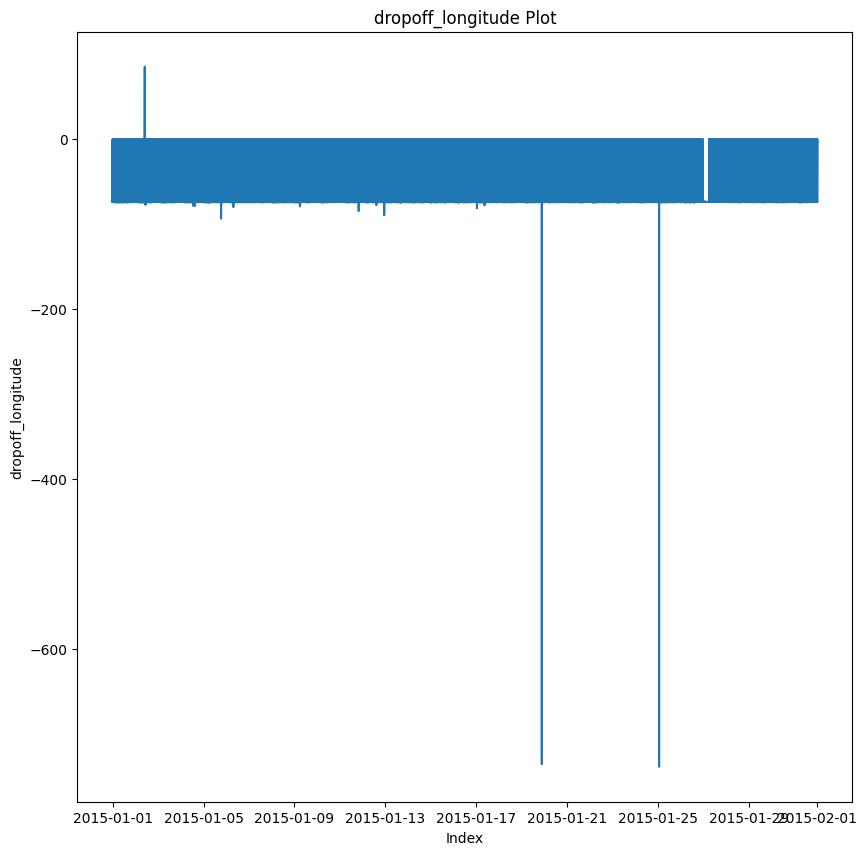

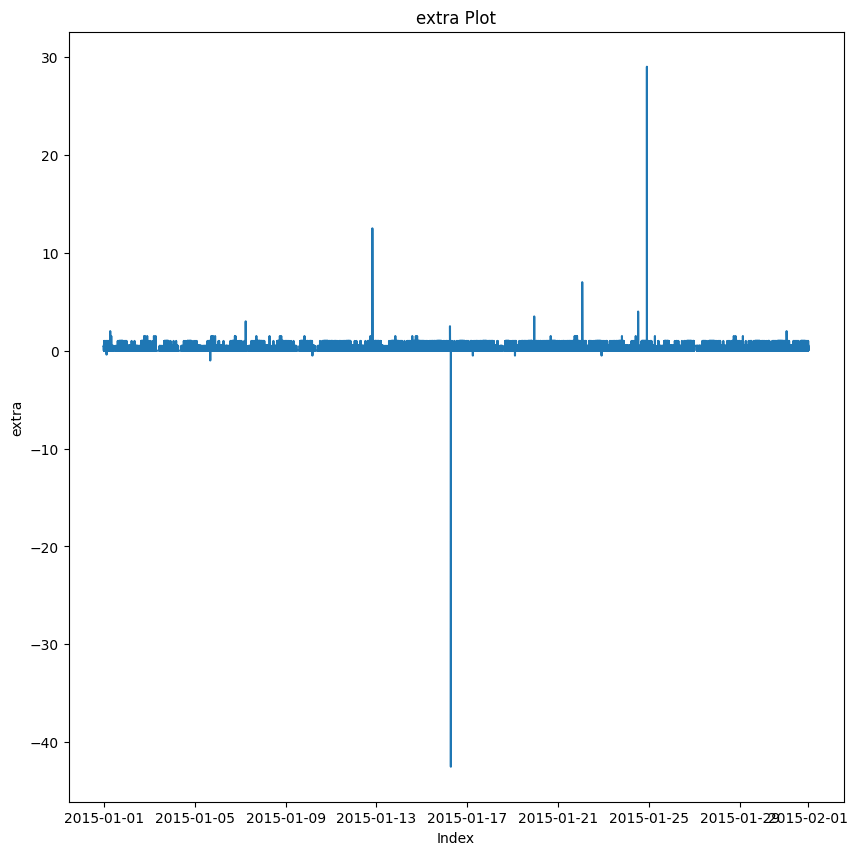

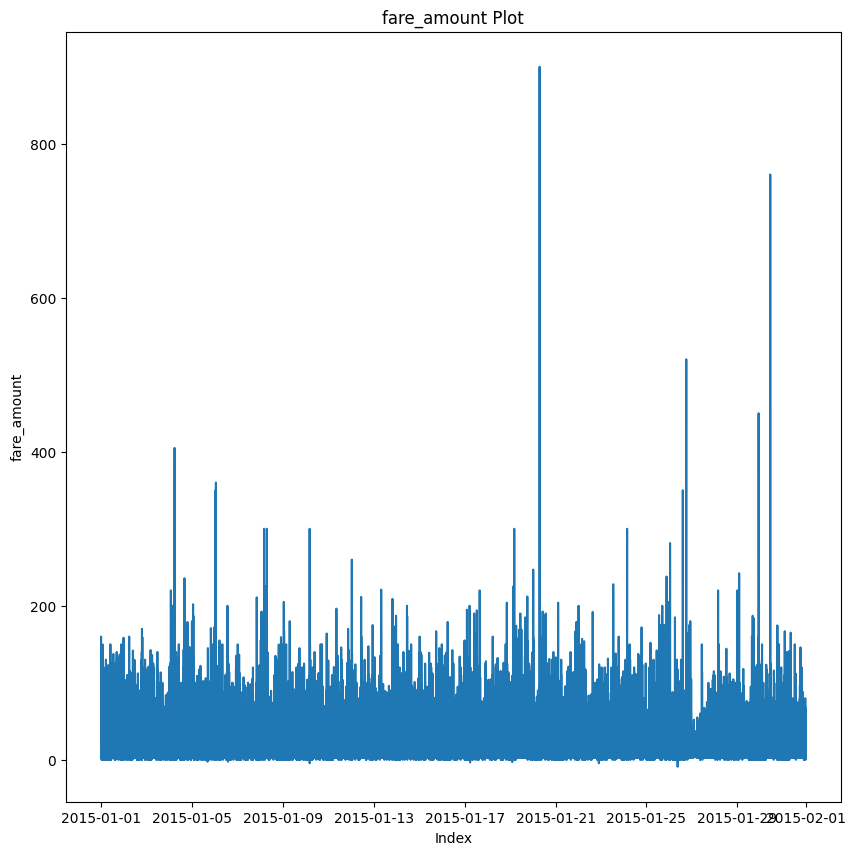

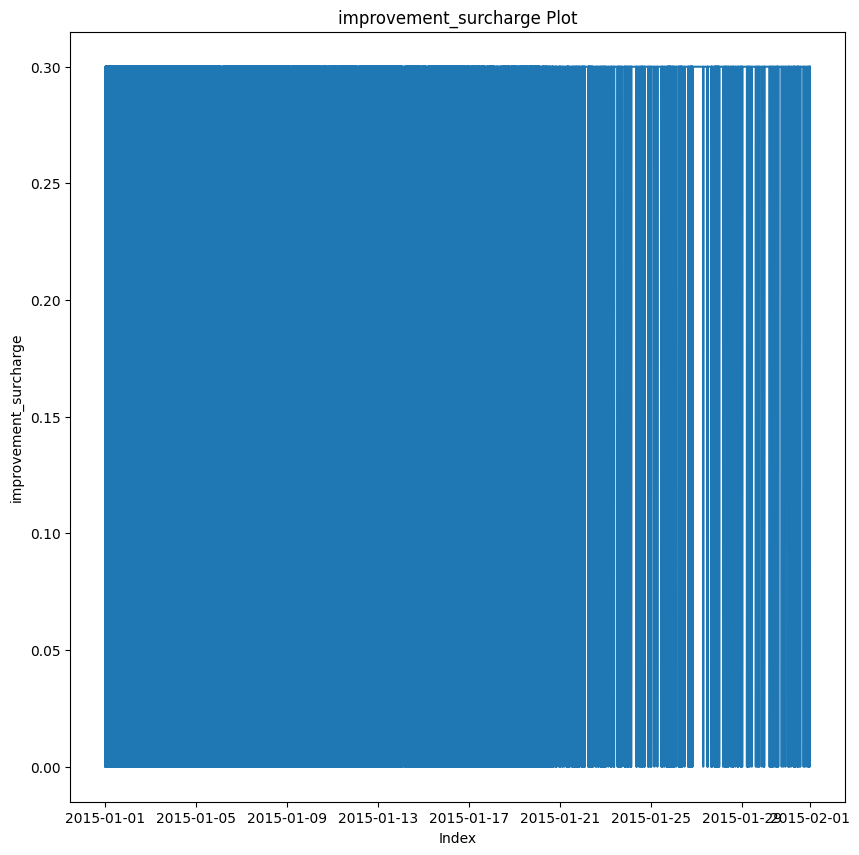

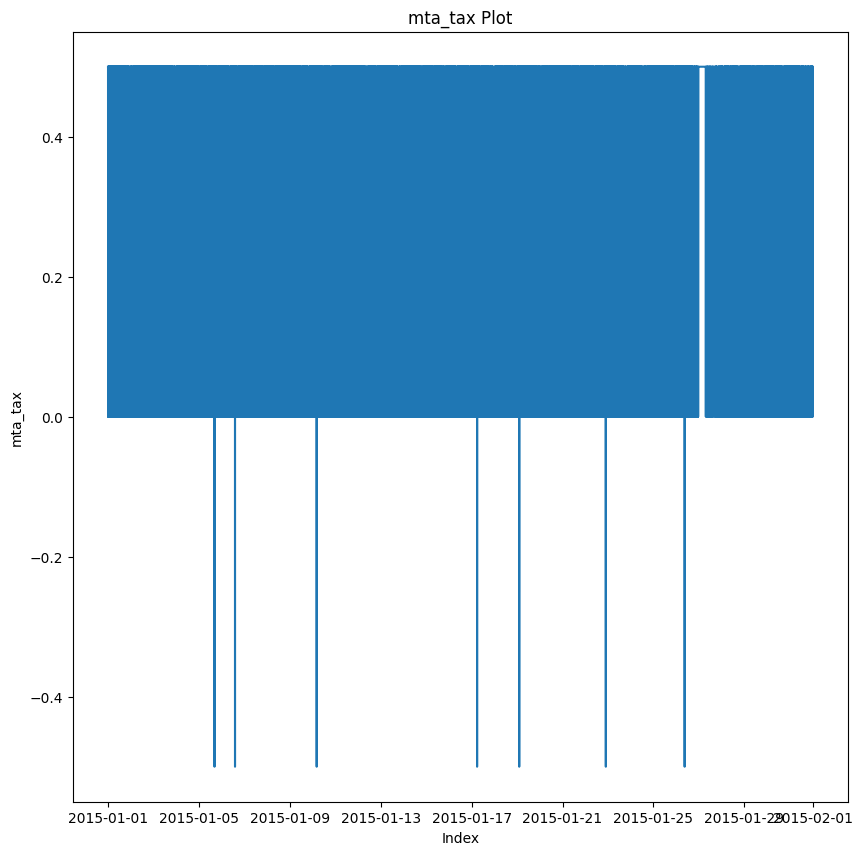

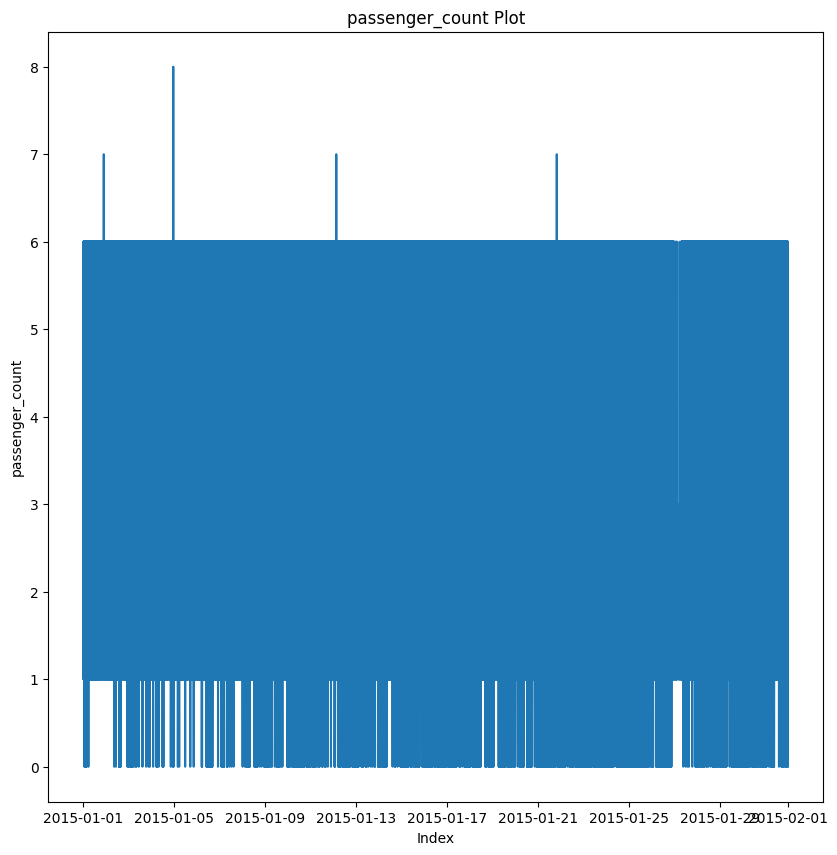

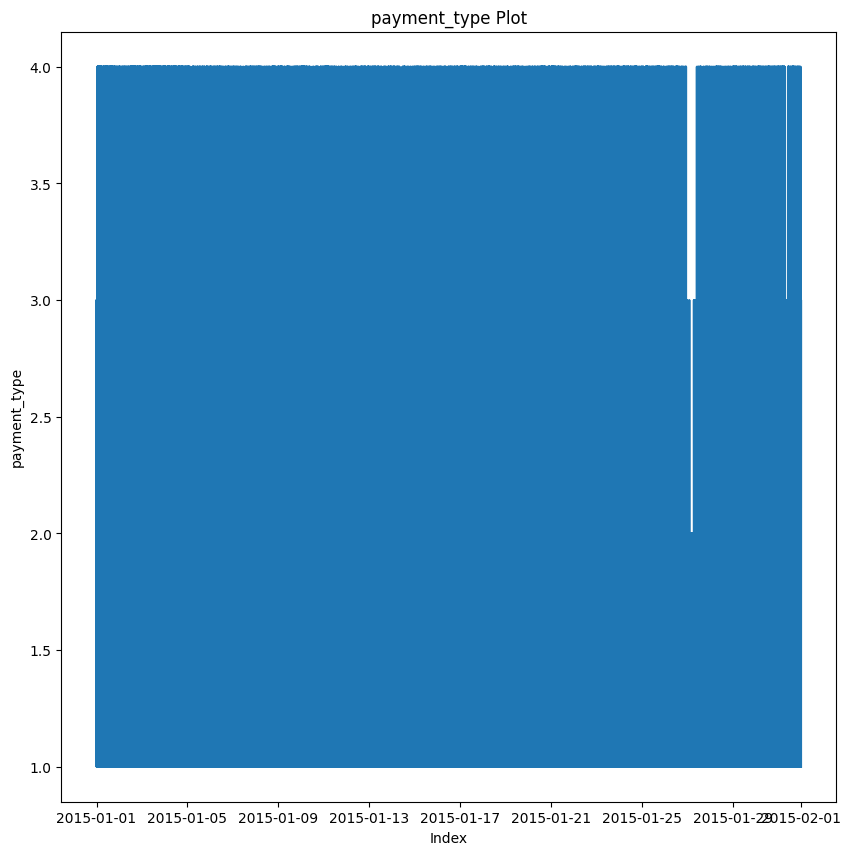

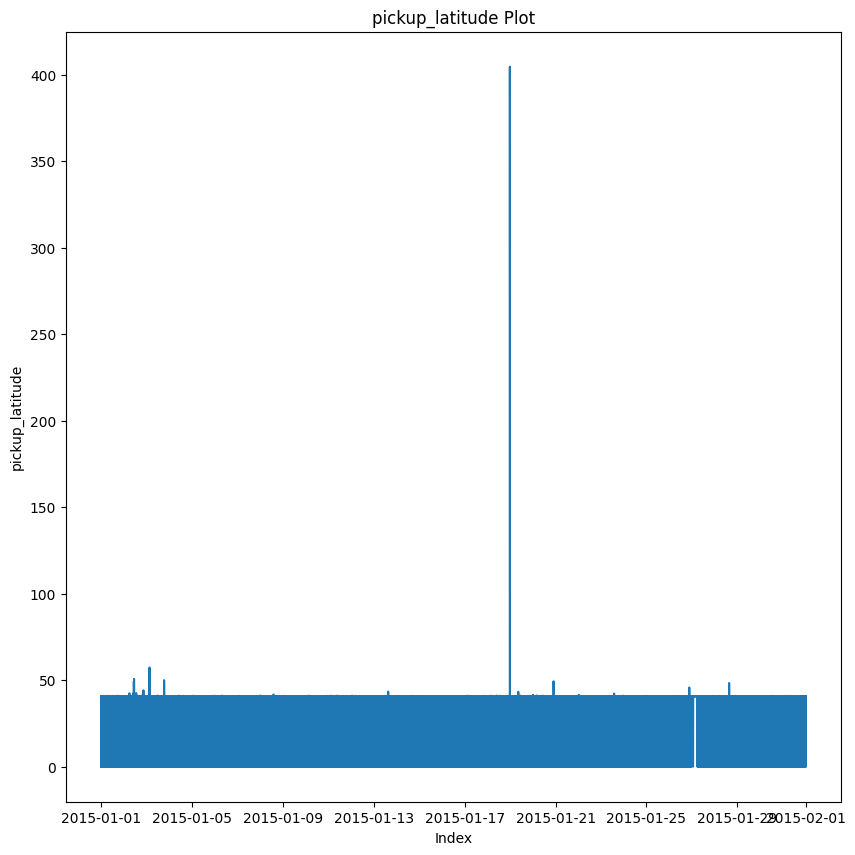

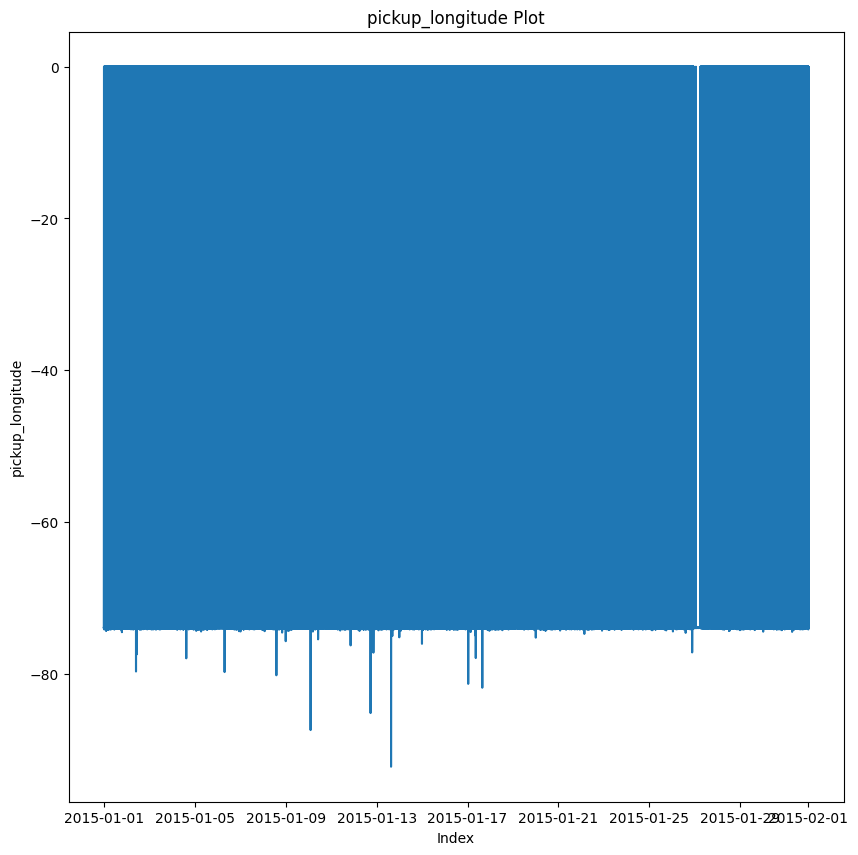

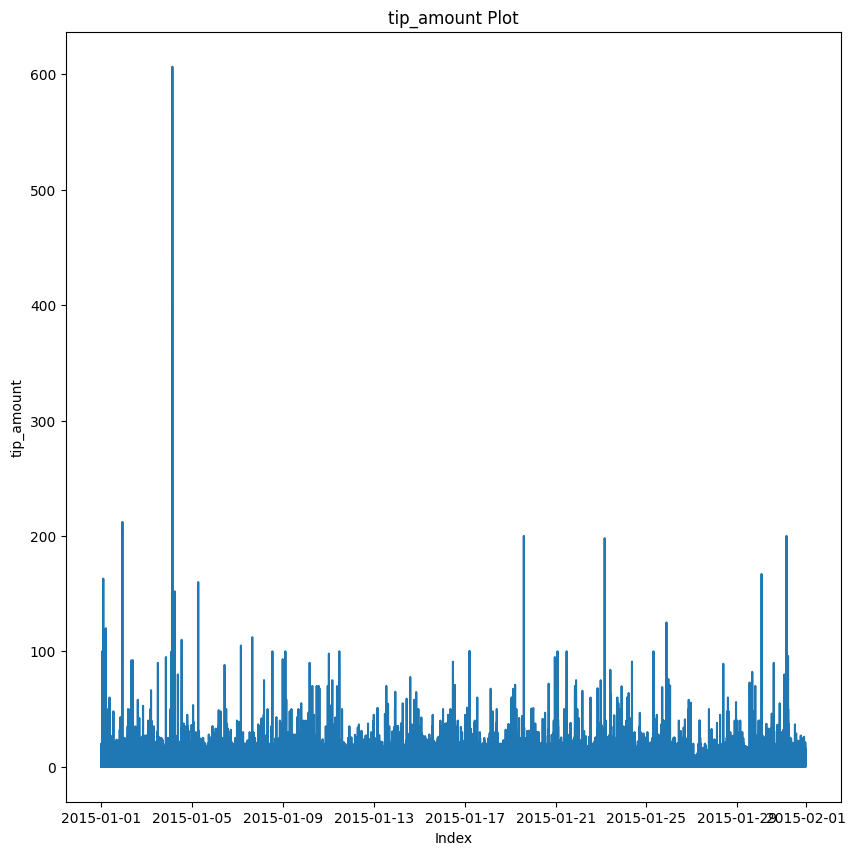

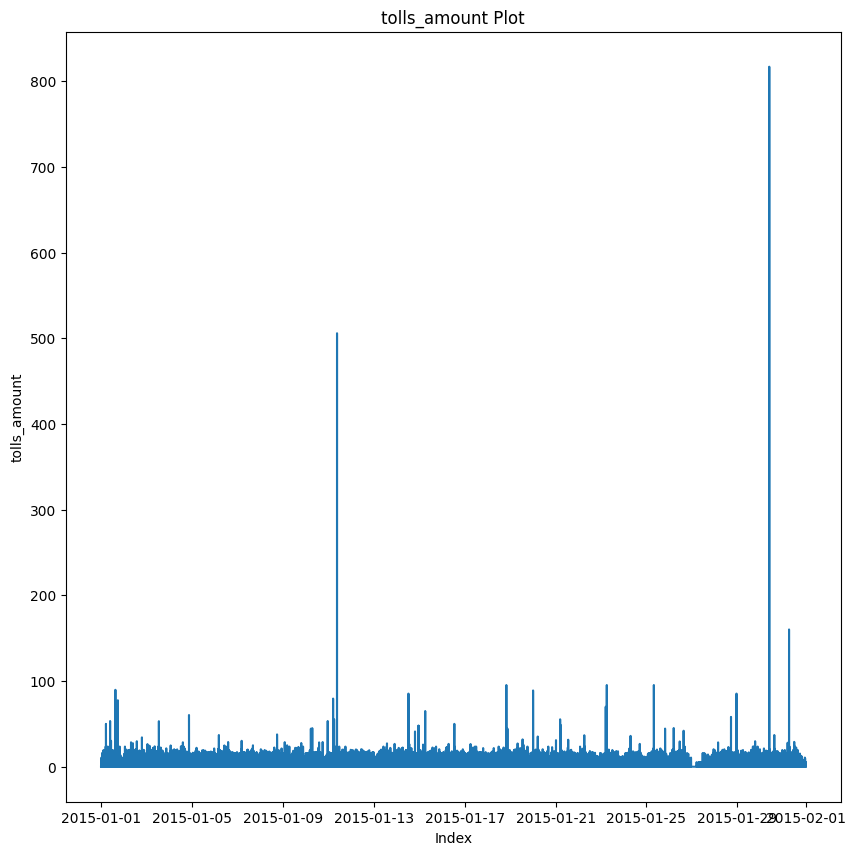

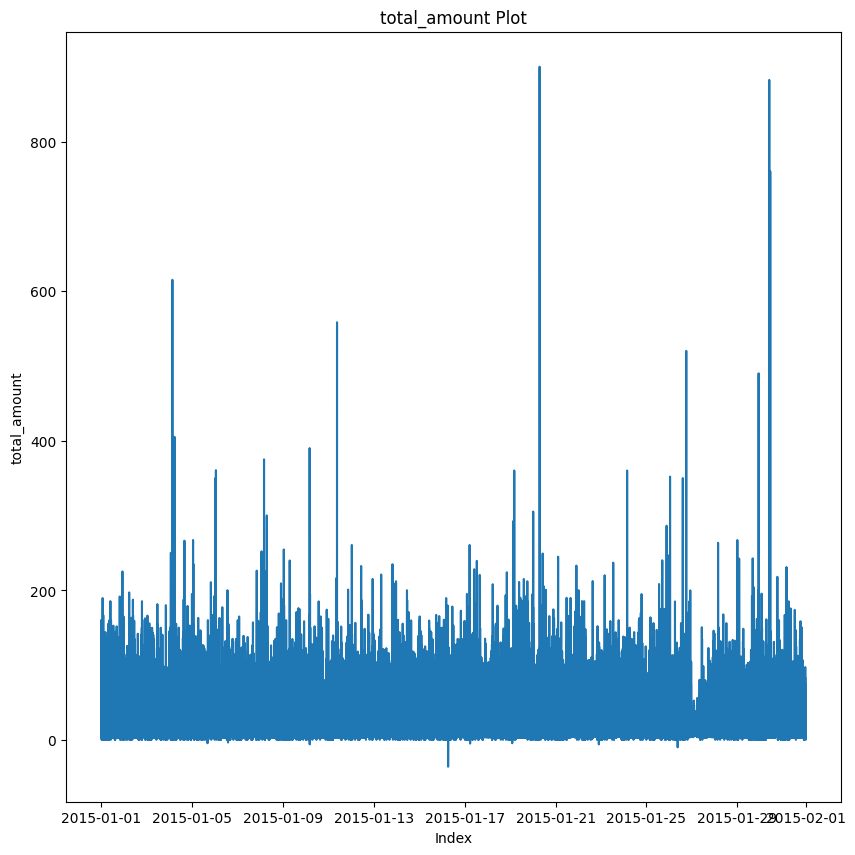

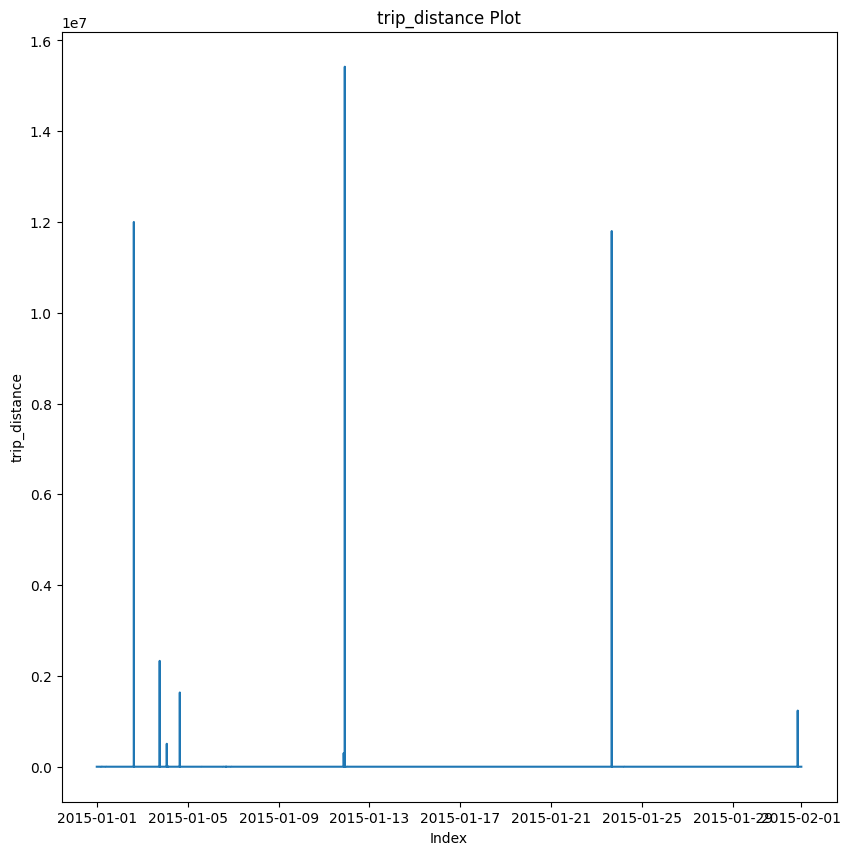

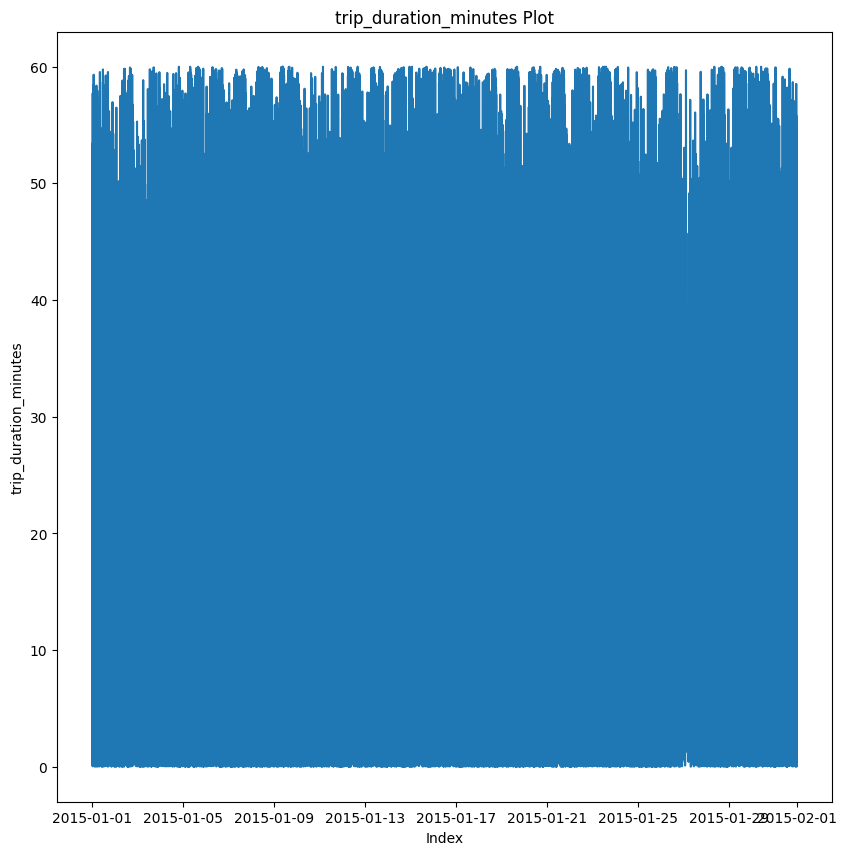

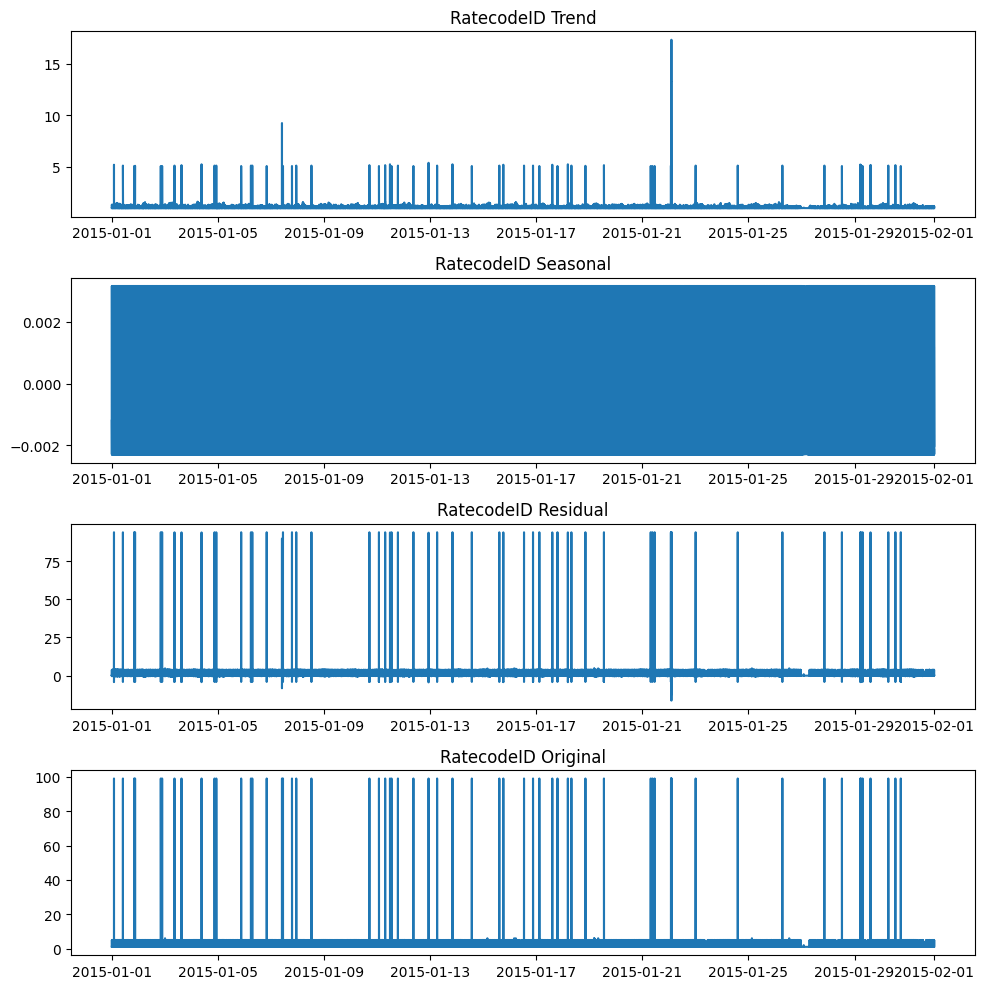

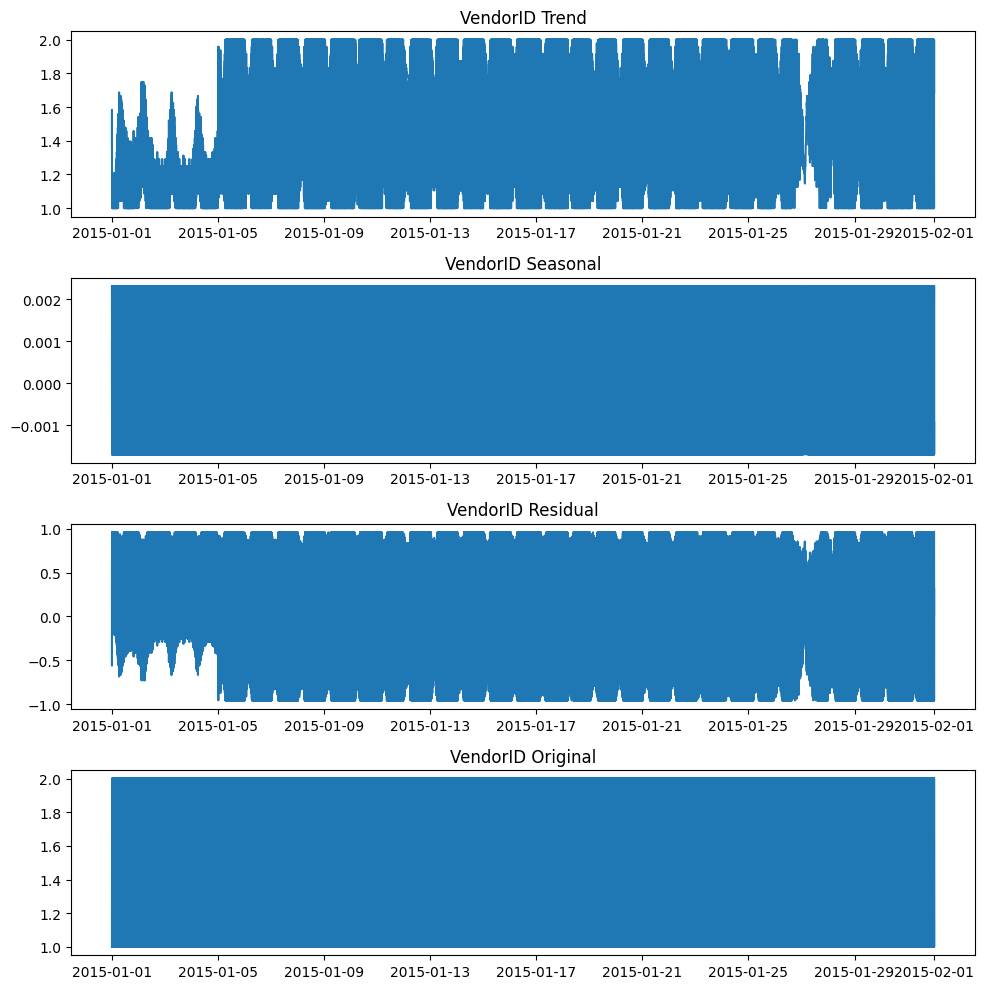

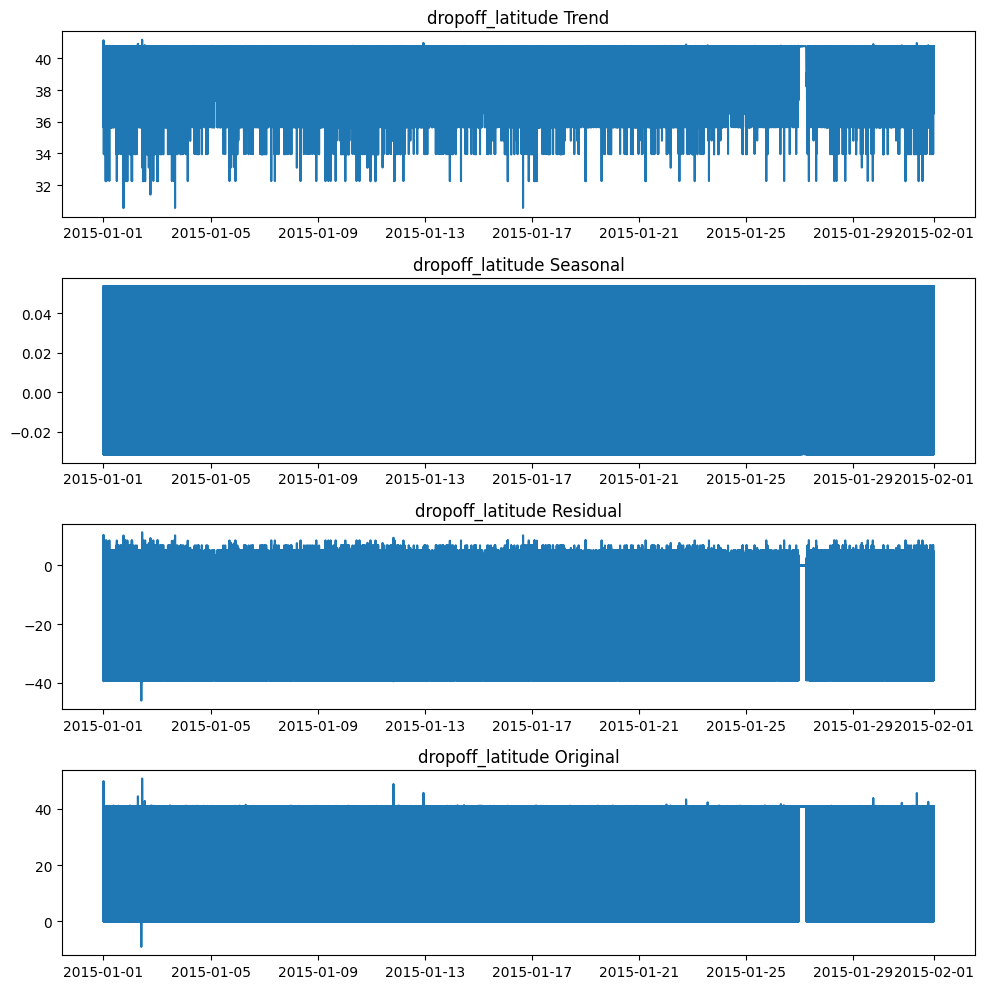

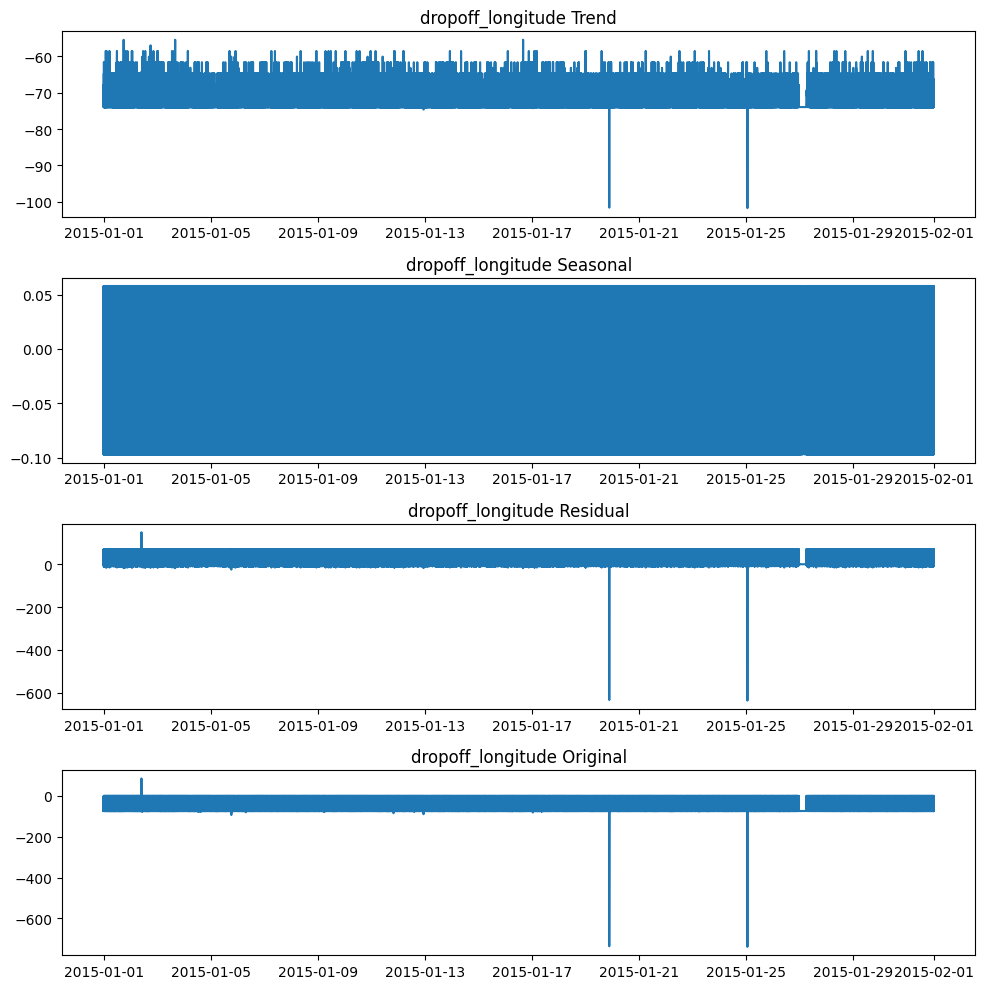

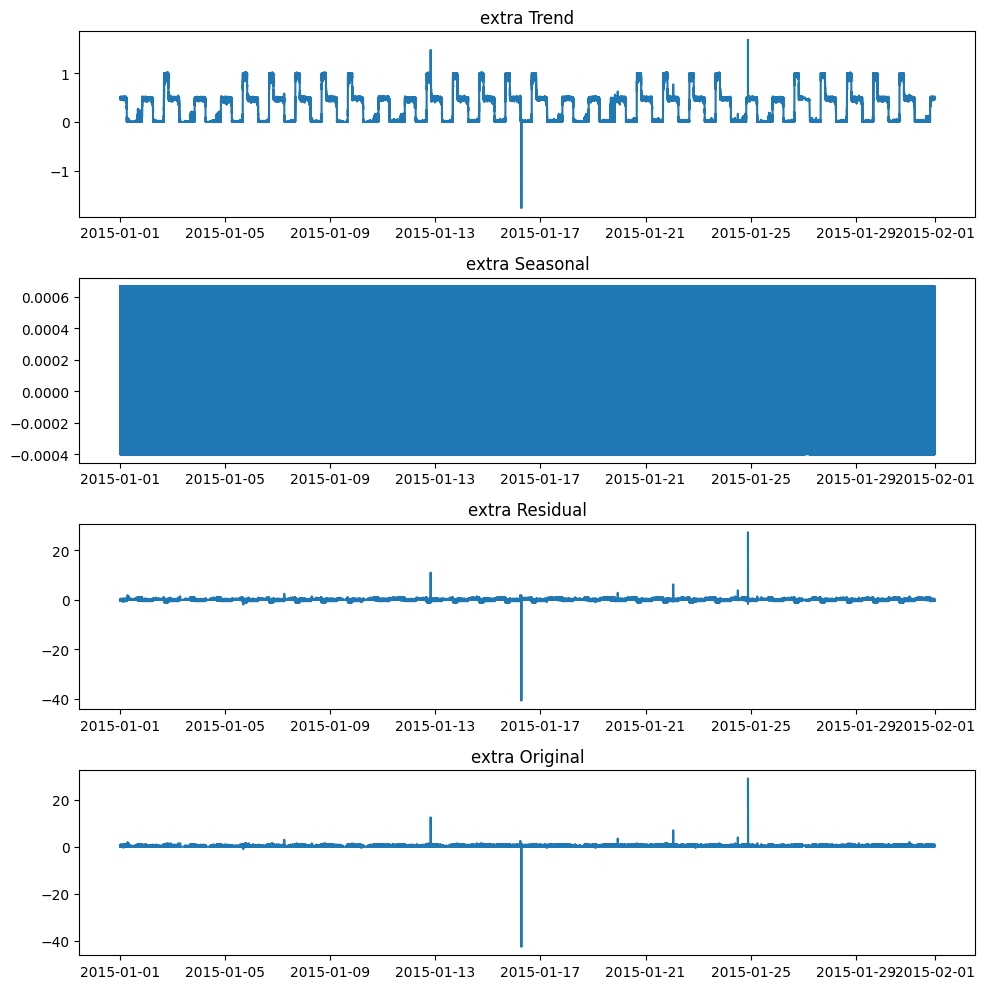

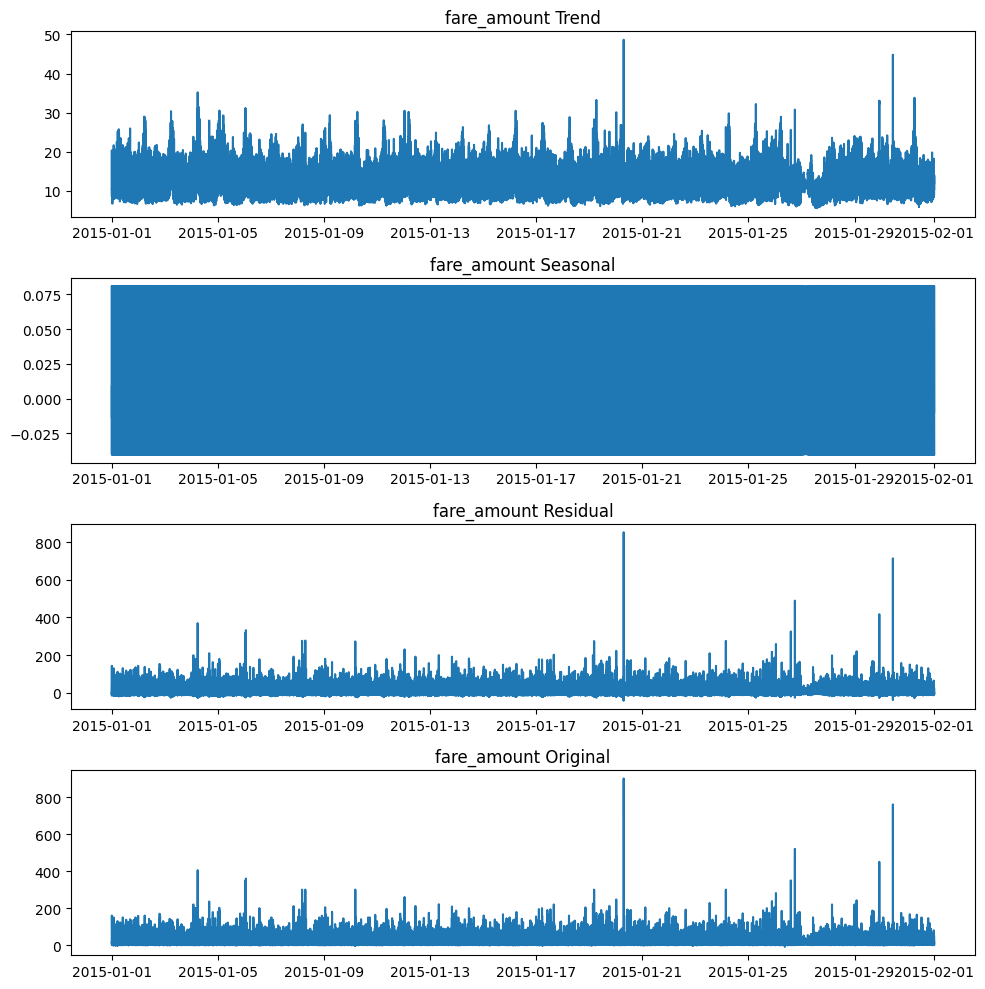

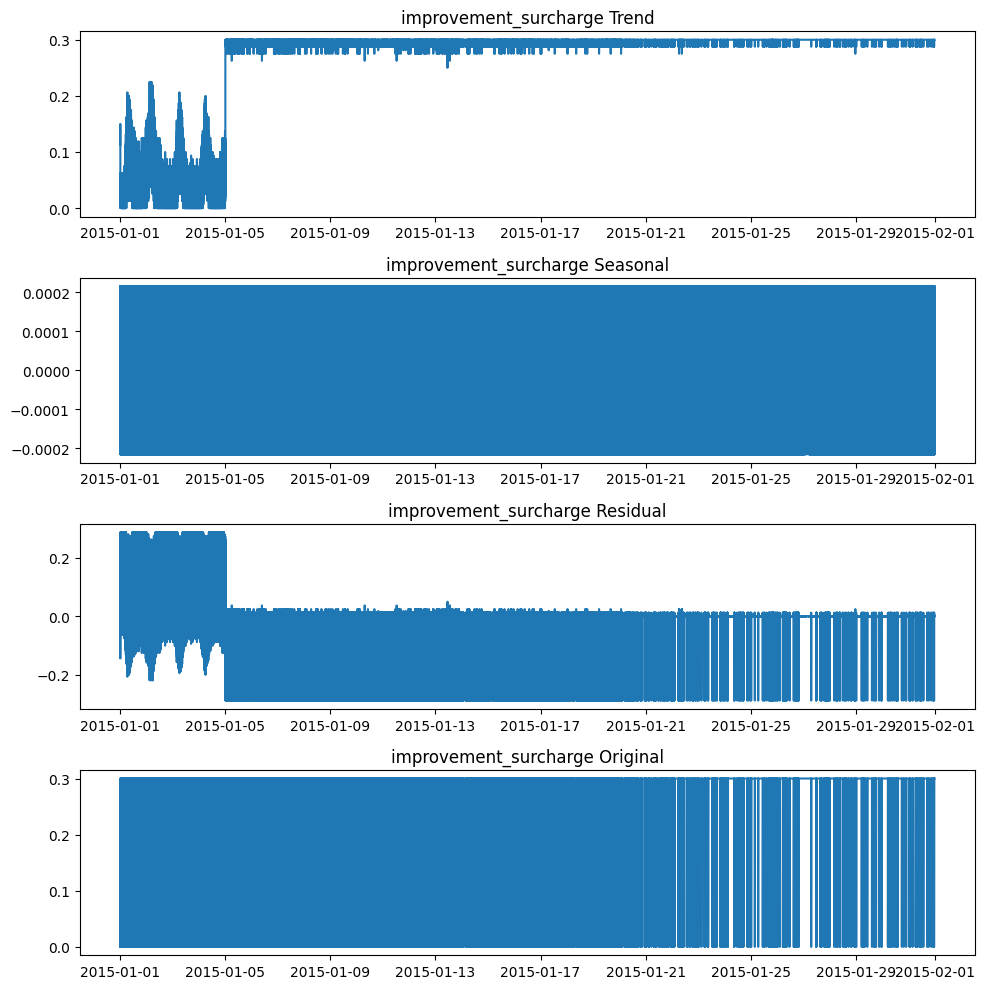

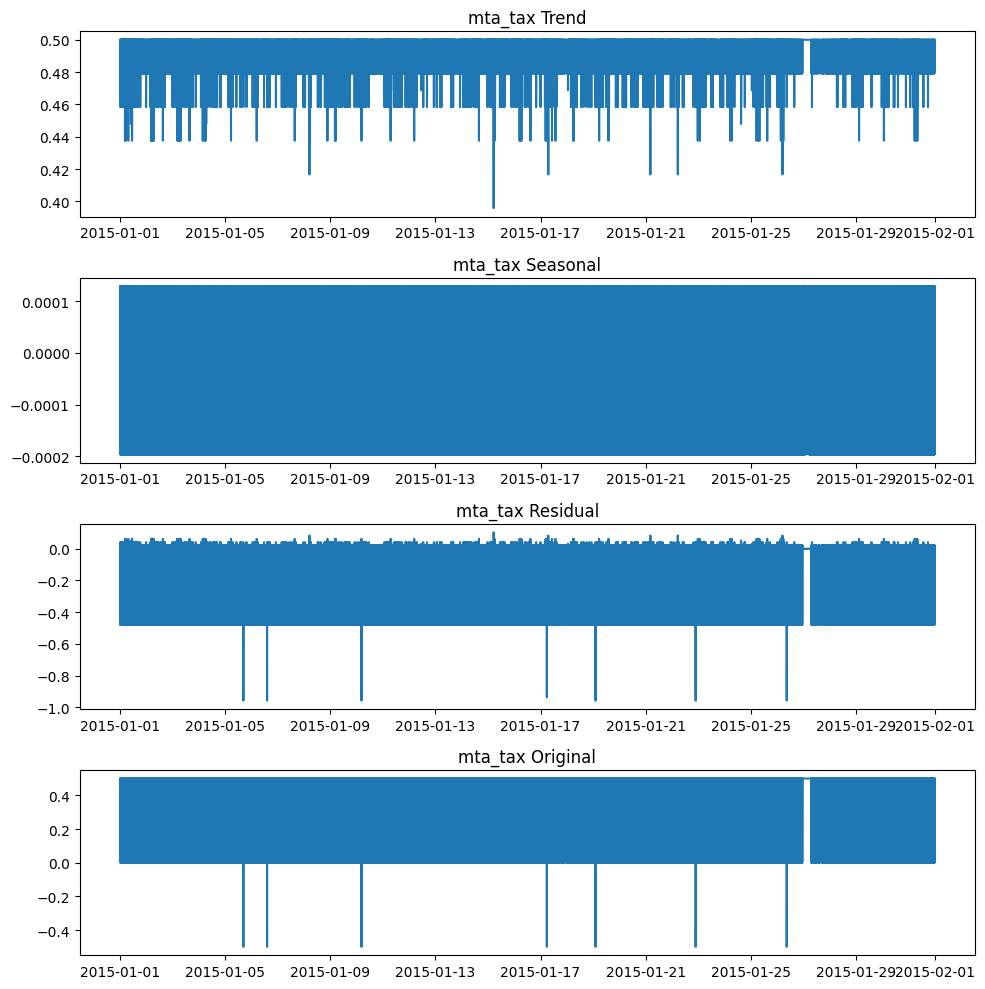

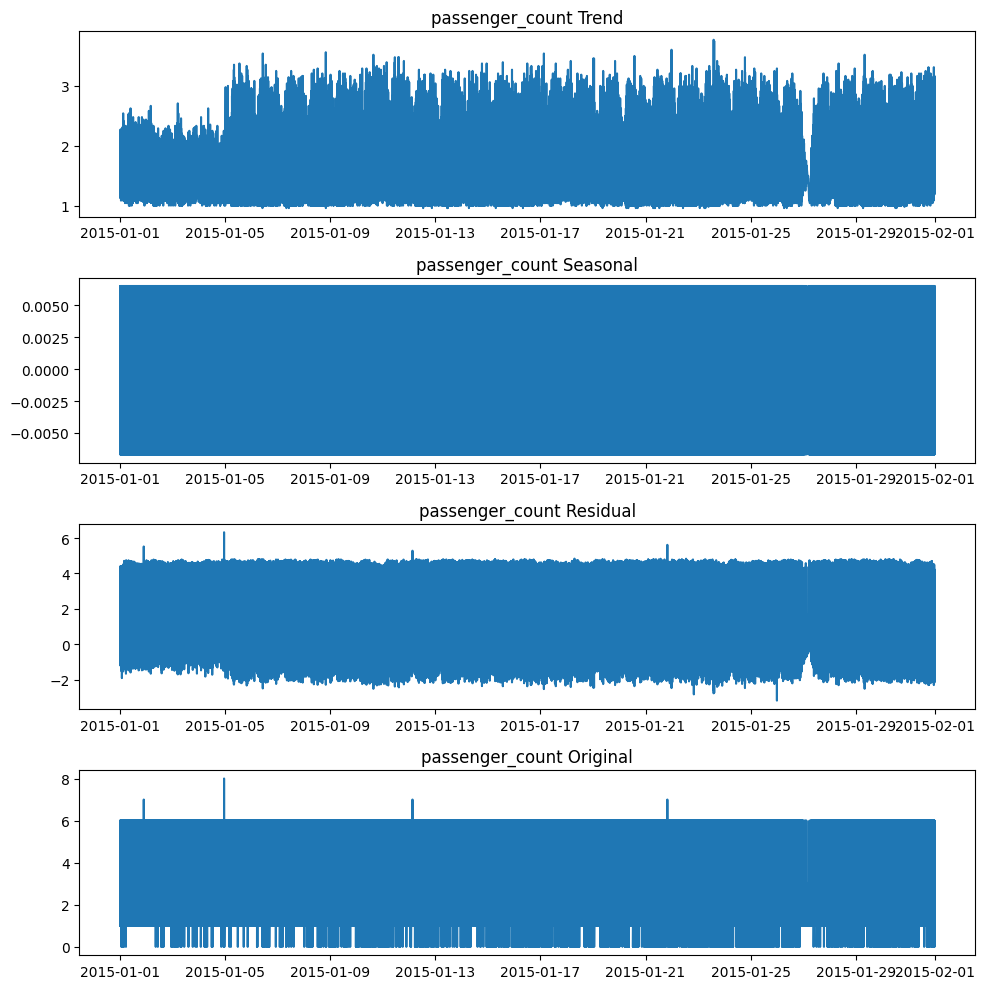

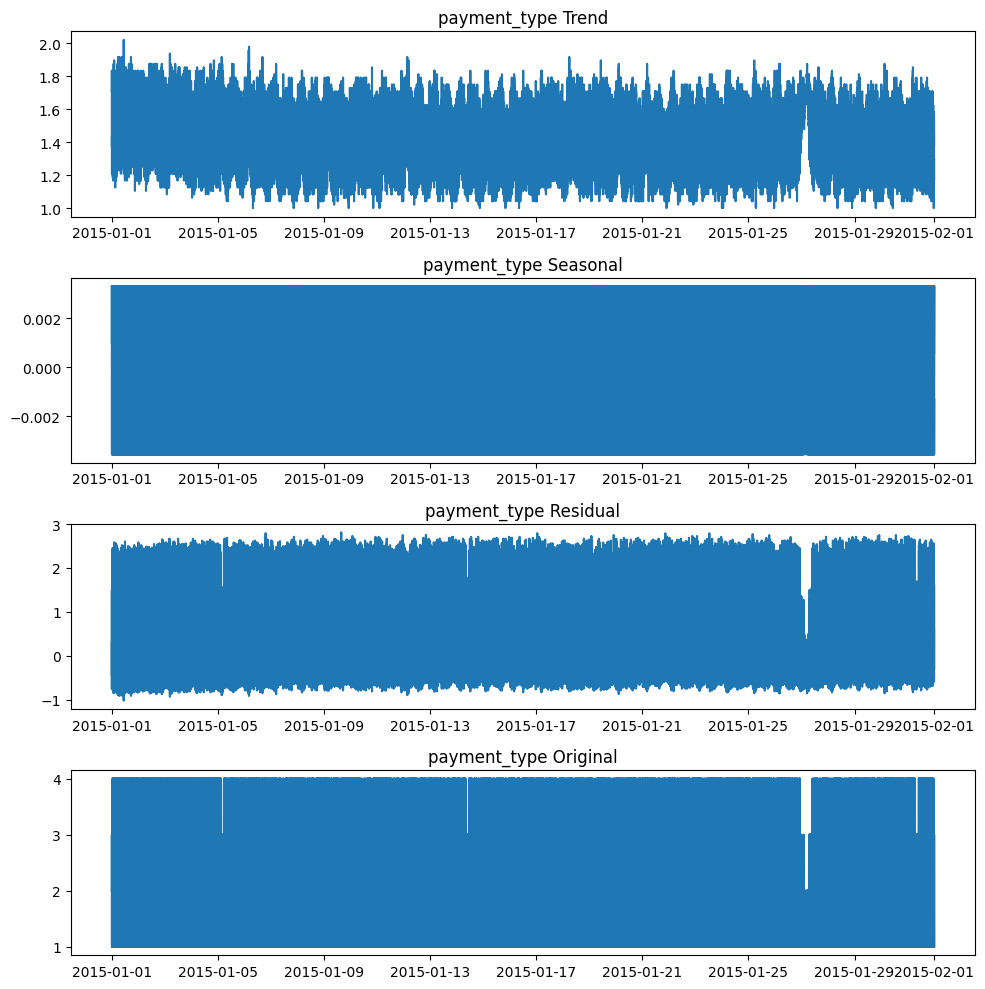

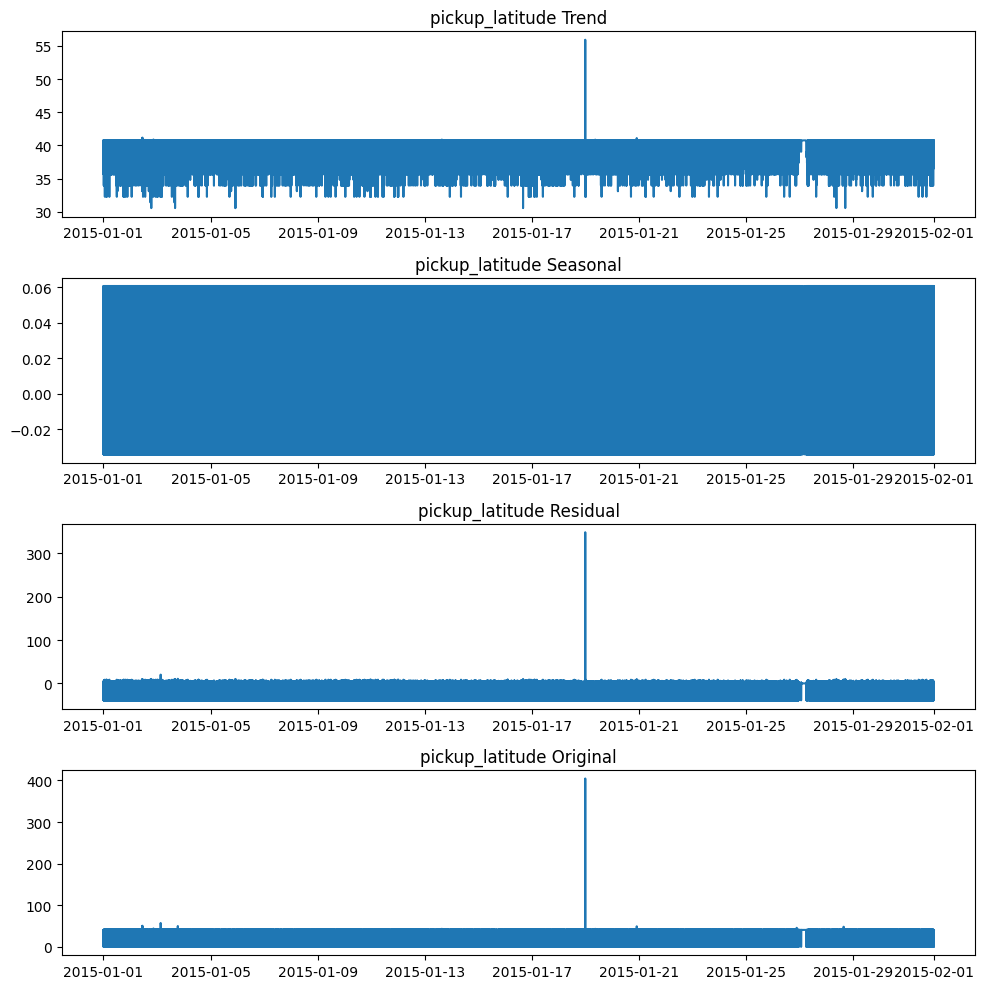

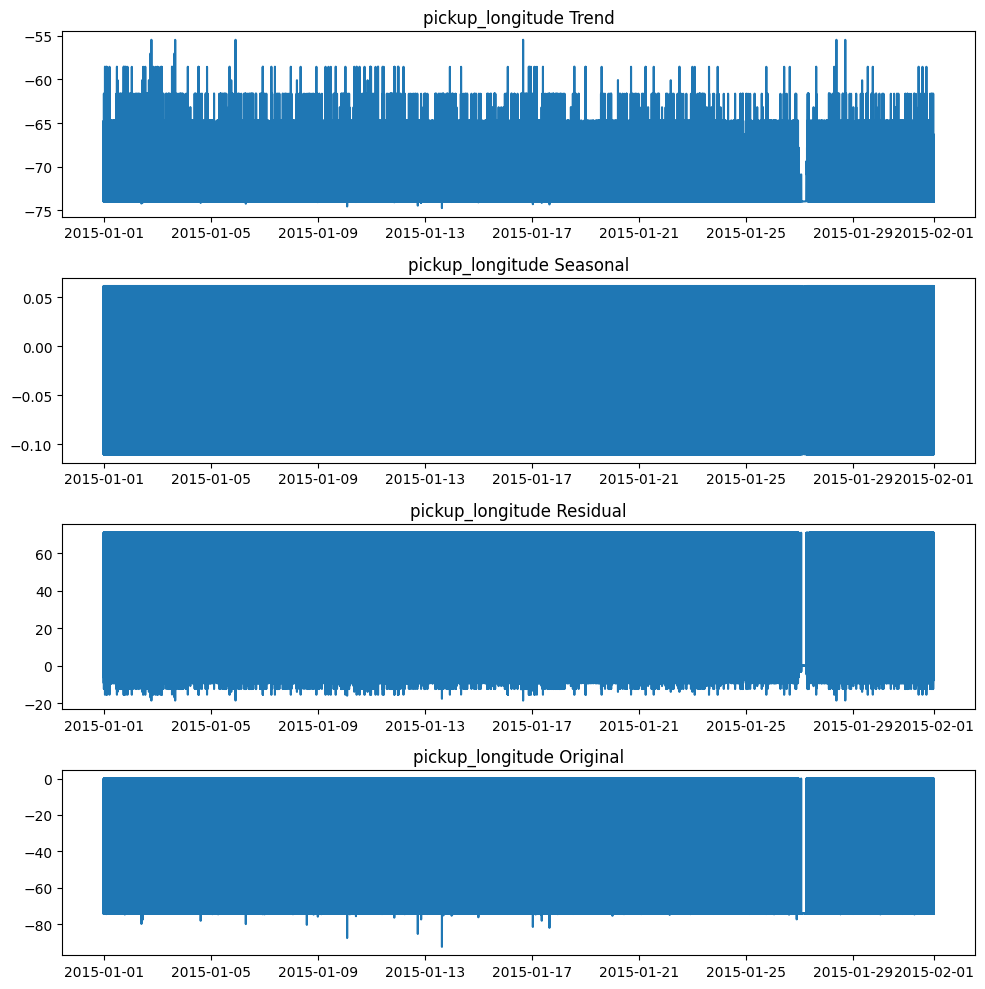

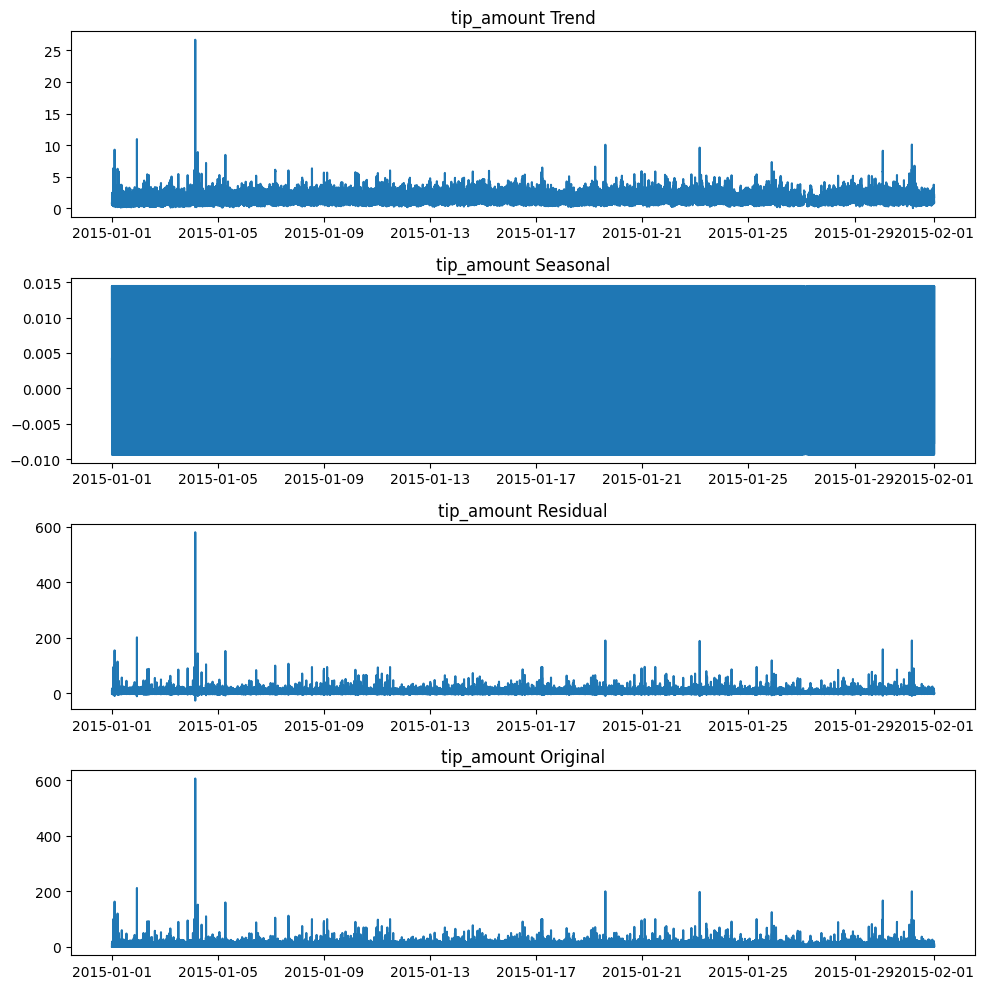

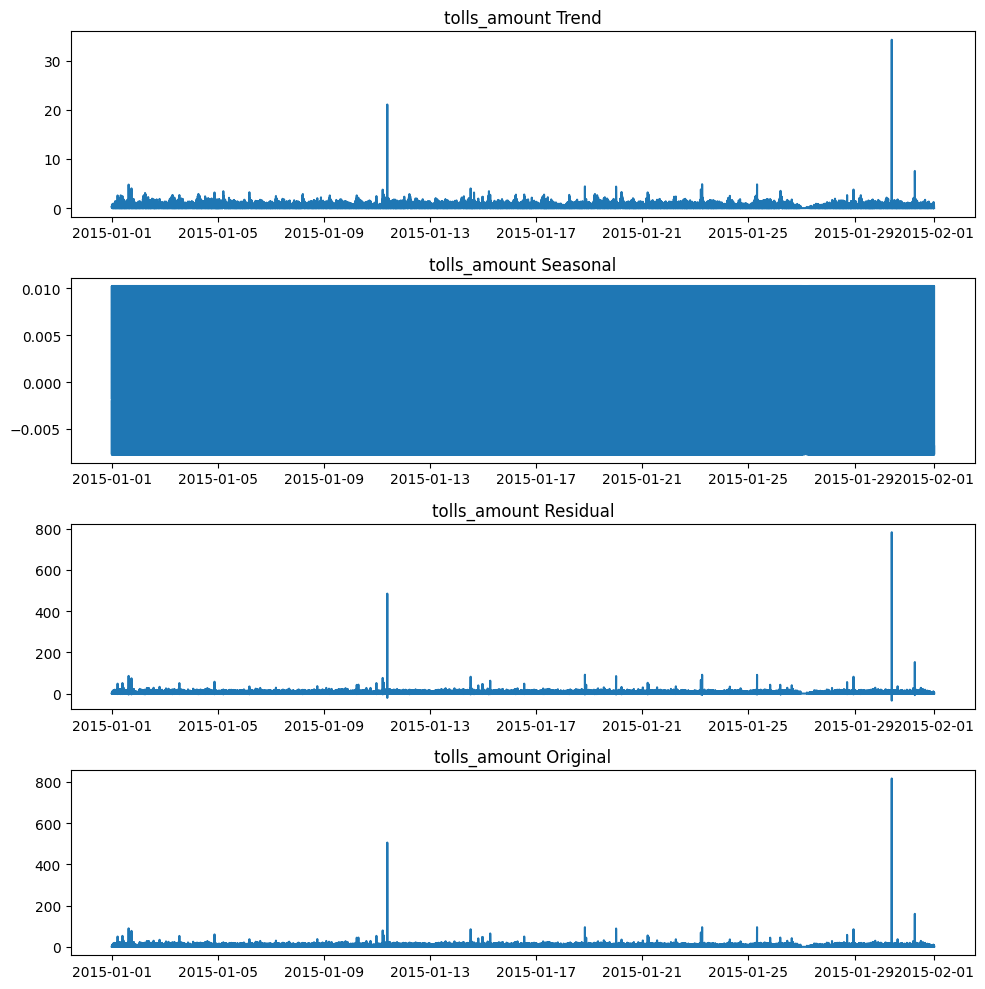

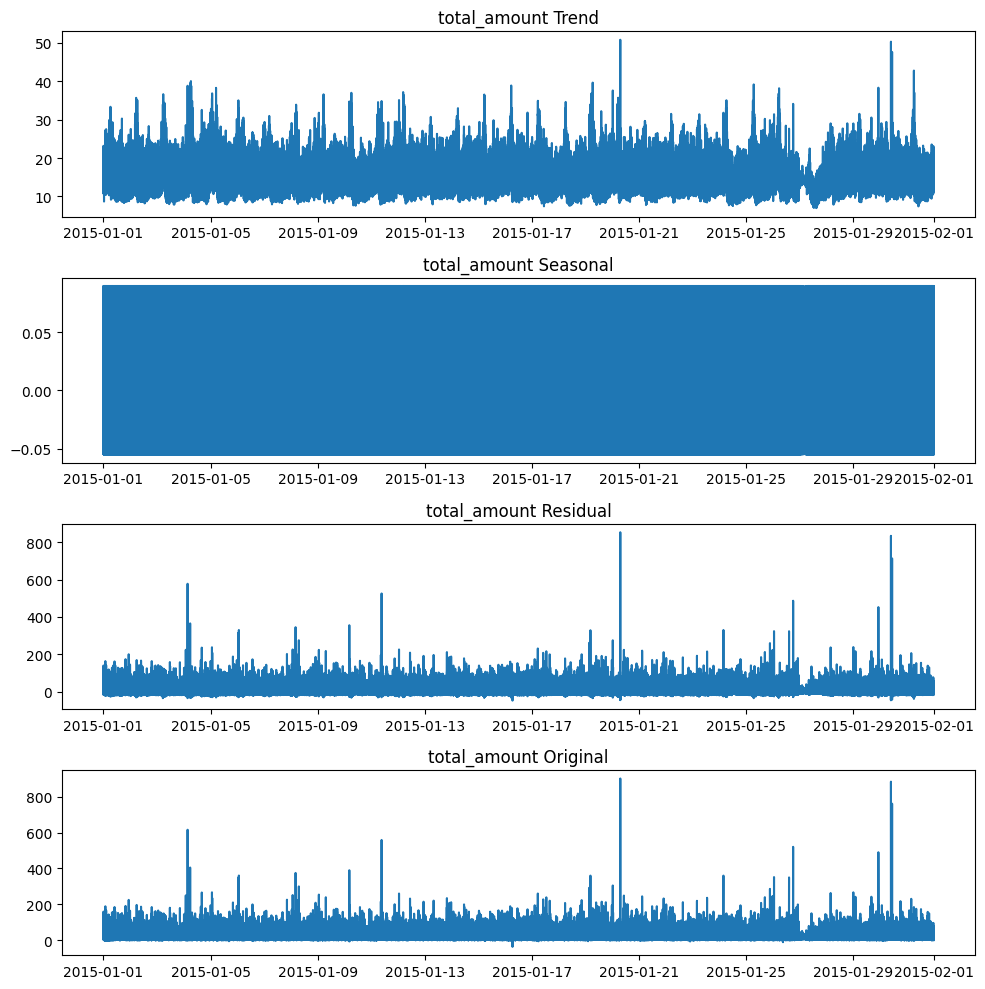

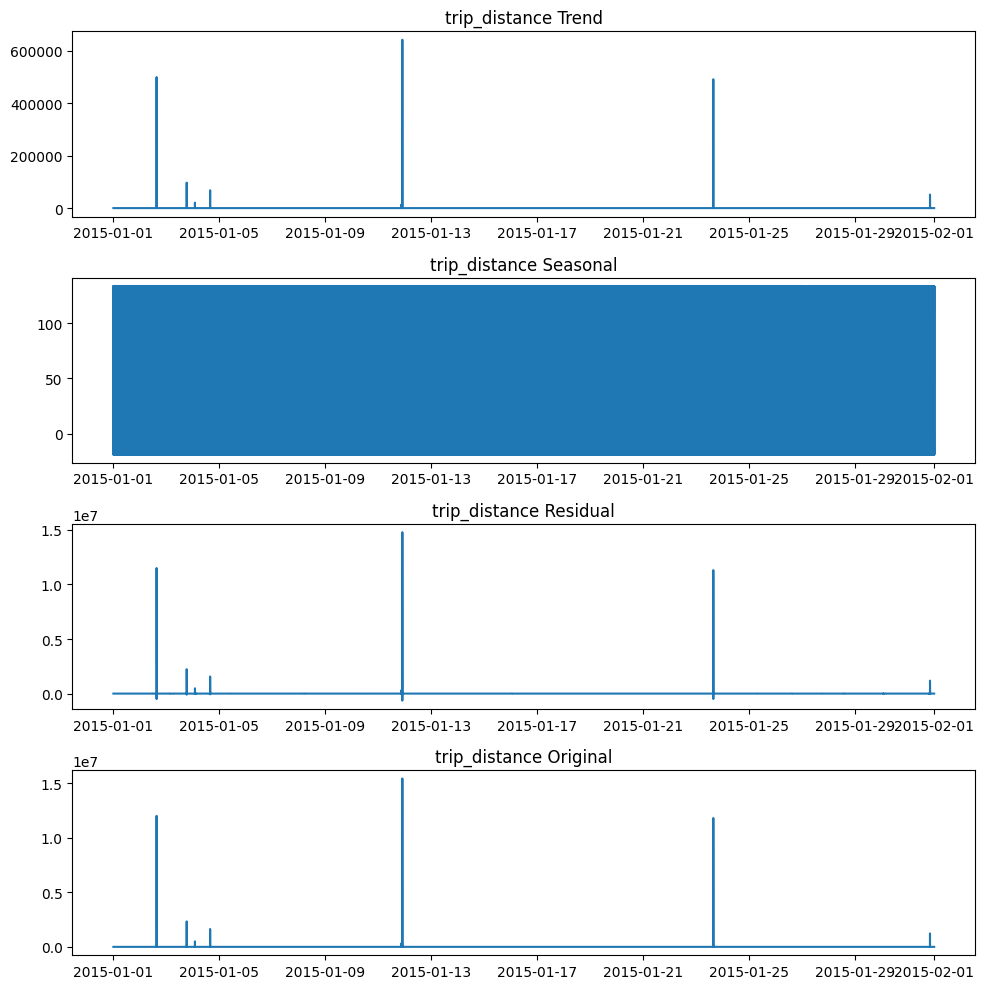

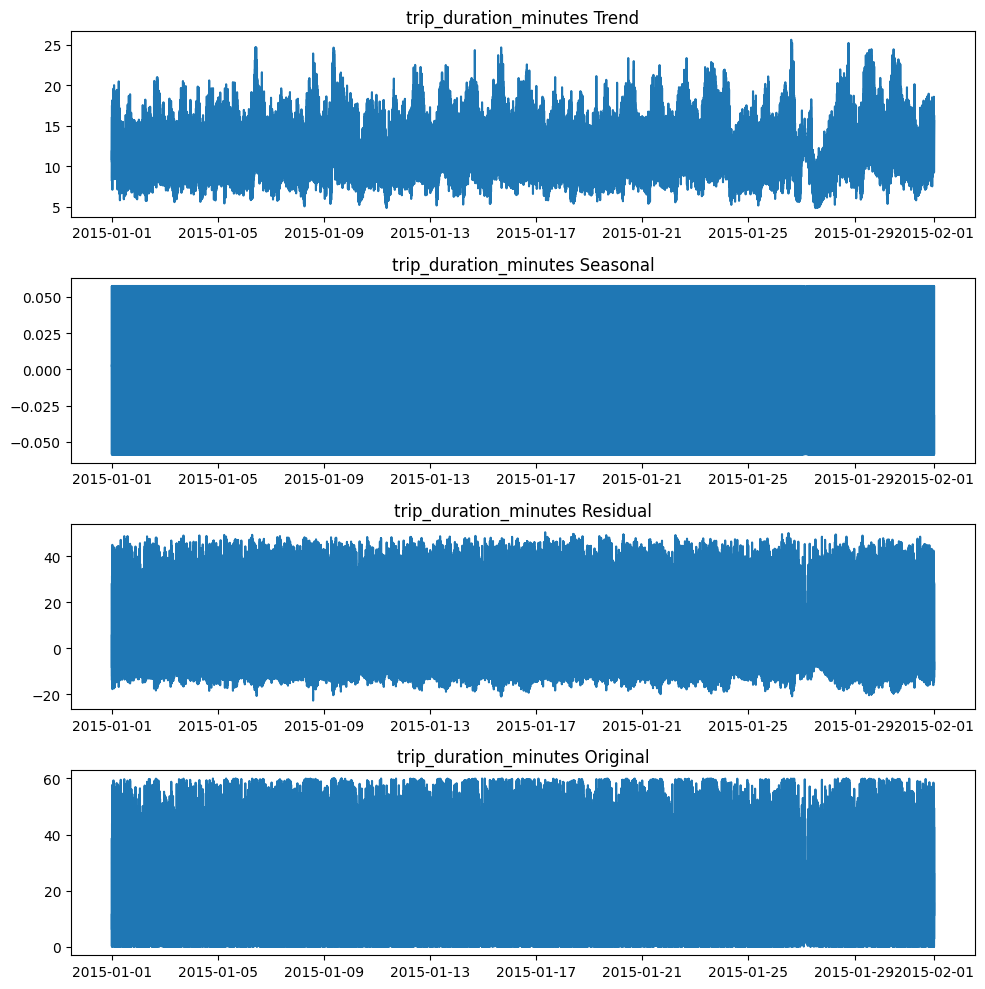

Save Finish


In [7]:
# Adjust period based on data for Decomposition
period = 24
# Plot width 
x_size = 10
# Plot height
y_size = 10
# Set option
# 1.HeatMap, 2.plot, 3.Decomposition, 4.All 
option = 4

# Set Start Function
Visualize_EDA(df, period, x_size, y_size, option)

## Check Statistical_Test

In [8]:
# Check ADF Test
adf_test(df[:10000])


adf_test for column: RatecodeID
ADF Statistic: -100.08004283828436
p-value: 0.0
Critical Values: {'1%': -3.4310041633725734, '5%': -2.861829101294412, '10%': -2.566923883481157}
The series is stationary
------------------------------------------------------------------------------------------------------------------

adf_test for column: VendorID
ADF Statistic: -11.589485531386192
p-value: 2.8145012617203818e-21
Critical Values: {'1%': -3.4310065936361585, '5%': -2.861830175207641, '10%': -2.5669244551266304}
The series is stationary
------------------------------------------------------------------------------------------------------------------

adf_test for column: dropoff_latitude
ADF Statistic: -56.445008438084656
p-value: 0.0
Critical Values: {'1%': -3.431004294278137, '5%': -2.861829159140512, '10%': -2.5669239142727114}
The series is stationary
------------------------------------------------------------------------------------------------------------------

adf_test for colum

In [9]:
# Check KPSS Test
kpss_test(df[:10000])


kpss_test for column: RatecodeID
KPSS Statistic: 0.23668859124997715
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The series is stationary
------------------------------------------------------------------------------------------------------------------

kpss_test for column: VendorID
KPSS Statistic: 1.307547242084167
p-value: 0.01
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The series is not stationary
------------------------------------------------------------------------------------------------------------------

kpss_test for column: dropoff_latitude
KPSS Statistic: 0.048797333614443994
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
The series is stationary
------------------------------------------------------------------------------------------------------------------

kpss_test for column: dropoff_longitude
KPSS Statistic: 0.04626959586836064
p-value: 0.1
Critical Value

In [10]:
# Check PP Test
pp_test(df[:10000])


pp_test for column: RatecodeID

Phillips-Perron Test for column: RatecodeID
Test Statistic: -100.08550807709022
p-value: 0.0
The series is stationary
------------------------------------------------------------------------------------------------------------------

pp_test for column: VendorID

Phillips-Perron Test for column: VendorID
Test Statistic: -105.16811673810099
p-value: 0.0
The series is stationary
------------------------------------------------------------------------------------------------------------------

pp_test for column: dropoff_latitude

Phillips-Perron Test for column: dropoff_latitude
Test Statistic: -100.68663581056113
p-value: 0.0
The series is stationary
------------------------------------------------------------------------------------------------------------------

pp_test for column: dropoff_longitude

Phillips-Perron Test for column: dropoff_longitude
Test Statistic: -100.68838270126992
p-value: 0.0
The series is stationary
-----------------------------

In [11]:
# Check ljung box Test
ljung_box_test(df[:10000], lags=10)


Ljung-Box Test for column: RatecodeID
p-value: 0.9999999989123288
No autocorrelation
------------------------------------------------------------------------------------------------------------------

Ljung-Box Test for column: VendorID
p-value: 3.0859772705189187e-24
There is autocorrelation
------------------------------------------------------------------------------------------------------------------

Ljung-Box Test for column: dropoff_latitude
p-value: 0.5143395124082428
No autocorrelation
------------------------------------------------------------------------------------------------------------------

Ljung-Box Test for column: dropoff_longitude
p-value: 0.4987602111719499
No autocorrelation
------------------------------------------------------------------------------------------------------------------

Ljung-Box Test for column: extra
p-value: 0.7011045869906476
No autocorrelation
----------------------------------------------------------------------------------------------

In [12]:
# Check Arch Test
arch_test(df[:10000])


arch_test for column: RatecodeID
ARCH Model Results:

Omega (Intercept): 1.04e+00
Alpha[1] (ARCH Term): 0.0000

Model Evaluation:
Log-Likelihood: -14374.97
AIC (Akaike Information Criterion): 28755.94
BIC (Bayesian Information Criterion): 28777.57

Interpretation:
Omega value is low, indicating a low level of volatility in the model.
Alpha[1] is low, suggesting that past variances have a weaker effect on current volatility.
------------------------------------------------------------------------------------------------------------------

arch_test for column: VendorID
ARCH Model Results:

Omega (Intercept): 4.34e-02
Alpha[1] (ARCH Term): 0.0368

Model Evaluation:
Log-Likelihood: 1352.73
AIC (Akaike Information Criterion): -2699.45
BIC (Bayesian Information Criterion): -2677.82

Interpretation:
Omega value is low, indicating a low level of volatility in the model.
Alpha[1] is low, suggesting that past variances have a weaker effect on current volatility.
-------------------------------

In [13]:
# Check VIF Test
vif_test(df[:10000])

Variable: const, VIF: 2566.04, Interpretation: High multicollinearity
Variable: RatecodeID, VIF: 1.08, Interpretation: Low multicollinearity
Variable: VendorID, VIF: 81.04, Interpretation: High multicollinearity
Variable: dropoff_latitude, VIF: 1420.21, Interpretation: High multicollinearity
Variable: dropoff_longitude, VIF: 1420.50, Interpretation: High multicollinearity
Variable: extra, VIF: 4.96, Interpretation: Low multicollinearity
Variable: fare_amount, VIF: 115526.00, Interpretation: High multicollinearity
Variable: improvement_surcharge, VIF: 81.12, Interpretation: High multicollinearity
Variable: mta_tax, VIF: 4.12, Interpretation: Low multicollinearity
Variable: passenger_count, VIF: 1.04, Interpretation: Low multicollinearity
Variable: payment_type, VIF: 1.23, Interpretation: Low multicollinearity
Variable: pickup_latitude, VIF: 42684.60, Interpretation: High multicollinearity
Variable: pickup_longitude, VIF: 42687.59, Interpretation: High multicollinearity
Variable: tip_amo